In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')
#smoker
df.replace(to_replace = 'male',
          value = 1,
          inplace = True)
df.replace(to_replace = 'female',
          value = 0,
          inplace = True)
#smoker
df.replace(to_replace = 'yes',
          value = 1,
          inplace = True)
df.replace(to_replace = 'no',
          value = 0,
          inplace = True)
# region
df.replace(to_replace = 'northeast',
          value = 0,
          inplace = True)
df.replace(to_replace = 'northwest',
          value = 1,
          inplace = True)
df.replace(to_replace = 'southeast',
          value = 2,
          inplace = True)
df.replace(to_replace = 'southwest',
          value = 3,
          inplace = True)

In [3]:
df.head()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop('charges',axis='columns').values)


In [5]:
scaled_y = sy.fit_transform(df['charges'].values.reshape(df.shape[0],1))
scaled_y
scaled_y.reshape(scaled_X.shape[0],)

array([0.25161076, 0.00963595, 0.05311516, ..., 0.00810808, 0.01414352,
       0.44724873])

In [6]:
def predict(age, sex, bmi, children, smoker, region, w, b):
    scaled_X = sx.transform([[age, sex, bmi, children, smoker, region]])[0]
    scaled_charge = w[0] * scaled_X[0] + w[1] * scaled_X[1] + w[2] * scaled_X[2] + w[3] * scaled_X[3] + w[4] * scaled_X[4] + w[5] * scaled_X[5] + b
    
    return sy.inverse_transform([[scaled_charge]])[0][0]



In [7]:
#Sochastic

In [8]:
import random
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

In [9]:
wSGD, bSGD, costSGD, cost_listSGD, epoch_listSGD = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),scaled_X.shape[0], .05)
wSGD, bSGD, costSGD

(array([0.90549938, 0.87771752, 0.92151915, 0.95469519, 0.95217448,
        0.89185196]),
 -0.18894843168346867,
 1.1687755243203661)

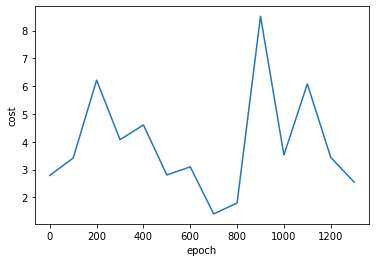

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_listSGD,cost_listSGD)
plt.show()

In [11]:
print(predict(19, 1, 27.9, 0, 1, 3, wSGD, bSGD))
print(predict(30, 1, 50.2, 2, 0, 0, wSGD, bSGD))
print(predict(33, 1, 22.705, 0, 0, 1, wSGD, bSGD))

179576.0881510797
136176.05201609666
91871.2327041604
